In [134]:
import tensorflow as tf
import math
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [135]:
# Import the data sets
boston_housing = keras.datasets.boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [136]:
# Shuffle the training set. 
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

print("Training set : {}".format(train_data.shape))
print("Test set : {}".format(test_data.shape))

Training set : (404, 13)
Test set : (102, 13)


In [148]:
column_names = ['CRIME', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIME,ZNdsdsd,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.397253,1.412057,-1.126646,-0.256833,-1.027385,0.726354,-1.000164,0.023834,-0.511142,-0.047533,-1.490674,0.415841,-0.836487
1,0.087846,-0.483615,1.028326,-0.256833,1.371293,-3.817250,0.676891,-1.049006,1.675886,1.565287,0.784476,-0.000885,-0.775760
2,-0.395379,1.201427,-0.690066,-0.256833,-0.942023,0.827918,-0.939245,0.259915,-0.626249,-0.914123,-0.398602,0.448077,-1.347144
3,-0.403759,3.097099,-1.022279,-0.256833,-1.095675,0.351129,-1.480347,2.364762,-0.626249,-0.330379,-0.262093,0.400521,-0.880652
4,-0.348692,-0.483615,-0.720935,-0.256833,-0.455458,3.467186,0.501302,-0.417158,-0.165822,-0.595170,-0.489608,0.289557,-1.119419


In [138]:
# Normalizing the features

'''
    It's recommended to normalize the features that use different scales
    and ranges. For each feature, sbutract the mean of the feature,
    and divide by the standard deviation
'''

mean = train_data.mean(axis = 0)
std = train_data.std(axis = 0)

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [139]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation=tf.nn.relu,
                          input_shape = (train_data.shape[1], )),
        keras.layers.Dense(64, activation = tf.nn.relu),
        keras.layers.Dense(1)
    ])
    
    optimizer = tf.train.RMSPropOptimizer(0.001)
    
    model.compile(loss = 'mse',
                 optimizer = optimizer,
                 metrics = ['mae'])
    
    return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_40 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [140]:
# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
    if EPOCHS == epoch + 1: print('DONE') 
    
EPOCHS = 500

# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])




....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................DONE


In [141]:
print(history.history.keys())

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


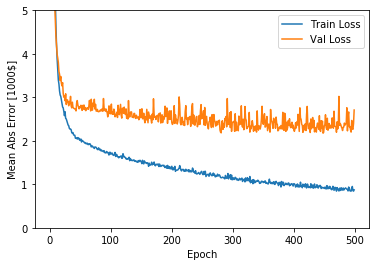

In [142]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), label = 'Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']), label = 'Val Loss')
    plt.legend()
    plt.ylim([0, 5])
    

plot_history(history)


....................................................................................................
..............................................................................

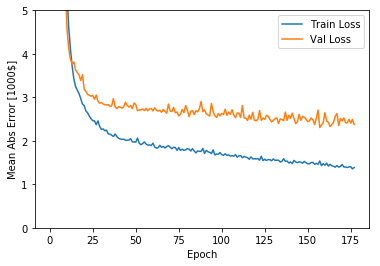

In [143]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [144]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $2581.50


In [147]:
print(test_labels)

[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]


In [146]:
test_predictions = model.predict(test_data).flatten()

print(test_predictions.shape)

(102,)
